In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import statsmodels.api as sm 
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg

In [39]:
from sklearn import datasets
from sklearn import model_selection   
from sklearn import linear_model
from sklearn import metrics
from sklearn import tree
from sklearn import neighbors
from sklearn import svm
from sklearn import ensemble
from sklearn import cluster
from sklearn.preprocessing import StandardScaler

%matplotlib inline
import matplotlib.pyplot as plt


In [ ]:
#read fifa 2020 data sheet 

In [ ]:
#, 'Goalkeeping', 'GK Diving',
 #     'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes'

In [3]:
df_fifa20= pd.read_csv ('fifa20_data.csv')
df_fifa20.drop(columns=['Image', 'Country', 'ID','Value','Height','Weight','Wage','Release Clause', 'Growth', 'Joined', 'Loan Date End', 
                        'foot', 'A/W', 'D/W'], inplace=True)
df_fifa20.head(18546)

C:\Users\capob\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (74) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Name,Position,Age,Overall,Potential,Club,BOV,BP,Attacking,Crossing,...,W/F,SM,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,Lionel Messi,"RW,CF,ST",32,94,94,FC Barcelona,95,CAM,433,88,...,4,4,5,87,92,92,96,39,66,585
1,C. Ronaldo dos Santos Aveiro,"ST,LW",34,93,93,Juventus,94,ST,437,84,...,4,5,5,90,93,82,89,35,78,448
2,Neymar da Silva Santos Jr.,"LW,CAM",27,92,92,Paris Saint-Germain,93,CAM,410,87,...,5,5,5,91,85,87,95,32,58,432
3,Jan Oblak,GK,26,91,91,Ath Madrid,91,GK,95,13,...,3,1,3,87,92,78,89,52,90,240
4,Kevin De Bruyne,"CAM,CM",28,91,91,Manchester City,91,CAM,404,93,...,5,4,4,76,86,92,86,61,78,298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18541,Evan Tweed,CM,20,48,48,Derry City,48,CM,204,37,...,3,2,1,52,37,47,46,42,49,12
18542,Sam Booth,GK,18,47,47,Crewe Alexandra,47,GK,58,12,...,2,1,1,47,45,40,50,25,43,6
18543,Joshua Woodcock,"RB,CDM",16,47,47,Lincoln City,47,RB,157,42,...,3,2,1,65,26,32,45,43,48,31
18544,Congyao Yin,"ST,CF",22,47,47,Chongqing Dangdai Lifan FC SWM Team,51,CAM,219,40,...,3,2,1,62,39,53,47,41,60,22


In [4]:
df_fifa20.columns

Index(['Name', 'Position', 'Age', 'Overall', 'Potential', 'Club', 'BOV', 'BP',
       'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy',
       'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve',
       'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'IR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF',
       'PHY', 'Hits'],
      dtype='object')

In [5]:
df_fifa20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18547 entries, 0 to 18546
Data columns (total 61 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              18547 non-null  object
 1   Position          18547 non-null  object
 2   Age               18547 non-null  int64 
 3   Overall           18547 non-null  int64 
 4   Potential         18547 non-null  int64 
 5   Club              18291 non-null  object
 6   BOV               18547 non-null  int64 
 7   BP                18547 non-null  object
 8   Attacking         18547 non-null  int64 
 9   Crossing          18547 non-null  int64 
 10  Finishing         18547 non-null  int64 
 11  Heading Accuracy  18547 non-null  int64 
 12  Short Passing     18547 non-null  int64 
 13  Volleys           18547 non-null  int64 
 14  Skill             18547 non-null  int64 
 15  Dribbling         18547 non-null  int64 
 16  Curve             18547 non-null  int64 
 17  FK Accuracy 

In [6]:
group = df_fifa20.loc[:, ["Position", "Name"]]

gf = pd.DataFrame(group, columns= ["Position", "Name"])

pos_dup = gf.pivot_table(index=["Position"], aggfunc='size')
print(pos_dup)


Position
CAM           264
CAM,CDM        13
CAM,CDM,CB      1
CAM,CDM,CM     13
CAM,CDM,LM      1
             ... 
ST,RW,RB        1
ST,RW,RM        7
ST,RW,RWB       1
ST,RWB          1
ST,RWB,LM       1
Length: 652, dtype: int64


In [ ]:
#Some attributes of goal keepers are applied to player and vice versa so we are separating them into two different dataframes

In [7]:
df_gk = df_fifa20[df_fifa20['Position']=='GK']
df_gk.drop(columns=[ 'Name','Attacking',
       'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Skill', 'Dribbling', 'Curve','FK Accuracy', 'Long Passing',
       'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 
                   'Reactions', 'Balance', 'Power', 'Shot Power',  'Stamina',
        'Long Shots', 'Aggression', 'Interceptions',
       'Positioning', 'Vision', 'Penalties',
       'Marking', 'Standing Tackle', 'Sliding Tackle', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'Defending'], inplace=True )
df_gk.head(2054)

C:\Users\capob\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Position,Age,Overall,Potential,Club,BOV,BP,Agility,Jumping,Strength,...,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,IR,PHY,Hits
3,GK,26,91,91,Ath Madrid,91,GK,67,78,78,...,78,90,89,1412,488,3,1,3,90,240
8,GK,27,90,90,FC Barcelona,90,GK,37,79,78,...,88,88,90,1442,484,4,1,3,88,266
12,GK,26,89,89,Liverpool,89,GK,40,52,78,...,85,90,89,1383,484,3,1,3,90,214
16,GK,28,89,89,Manchester United,89,GK,63,67,60,...,81,85,92,1473,490,3,1,4,85,141
24,GK,25,88,88,Manchester City,88,GK,60,66,68,...,93,86,88,1522,498,3,1,2,86,156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18514,GK,17,48,48,IK Sirius,48,GK,33,43,38,...,48,47,51,740,269,2,1,1,47,2
18519,GK,20,48,48,Waterford FC,48,GK,35,48,57,...,46,43,45,786,263,1,1,1,43,2
18521,GK,19,48,48,Bradford City,48,GK,28,52,38,...,45,48,51,852,266,3,1,1,48,5
18540,GK,17,48,48,Lille,48,GK,24,42,44,...,48,49,51,764,278,2,1,1,49,5


In [8]:
df_gk.rename(columns={"Position": "PositionGK", "Age": "AgeGK", "Overall": "OverallGK", "Potential": "PotentialGK",
                          "BOV": "BOVGK", "BP": "BPGK", "Agility": "AgilityGK", "Total Stats": "Total StatsGK",
                          "Base Stats": "Base StatsGK", "W/F": "W/FGK", "SM": "SMGK", "IR": "IRGK", 
                          "PHY": "PHYGK", "Hits": "HitsGK", 
                     "Jumping": "JumpingGK", "Strength": "StrengthGK", "Mentality": "MentalityGK", "Composure": "ComposureGK"}, inplace=True)
df_gk.head(5)

C:\Users\capob\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,PositionGK,AgeGK,OverallGK,PotentialGK,Club,BOVGK,BPGK,AgilityGK,JumpingGK,StrengthGK,...,GK Kicking,GK Positioning,GK Reflexes,Total StatsGK,Base StatsGK,W/FGK,SMGK,IRGK,PHYGK,HitsGK
3,GK,26,91,91,Ath Madrid,91,GK,67,78,78,...,78,90,89,1412,488,3,1,3,90,240
8,GK,27,90,90,FC Barcelona,90,GK,37,79,78,...,88,88,90,1442,484,4,1,3,88,266
12,GK,26,89,89,Liverpool,89,GK,40,52,78,...,85,90,89,1383,484,3,1,3,90,214
16,GK,28,89,89,Manchester United,89,GK,63,67,60,...,81,85,92,1473,490,3,1,4,85,141
24,GK,25,88,88,Manchester City,88,GK,60,66,68,...,93,86,88,1522,498,3,1,2,86,156


In [9]:
df_gk.columns


Index(['PositionGK', 'AgeGK', 'OverallGK', 'PotentialGK', 'Club', 'BOVGK',
       'BPGK', 'AgilityGK', 'JumpingGK', 'StrengthGK', 'MentalityGK',
       'ComposureGK', 'Goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking',
       'GK Positioning', 'GK Reflexes', 'Total StatsGK', 'Base StatsGK',
       'W/FGK', 'SMGK', 'IRGK', 'PHYGK', 'HitsGK'],
      dtype='object')

In [ ]:
# Goakeeping mean for goal keepers

In [10]:
gk_rate = df_gk.groupby('Club').mean().sort_values('Goalkeeping',ascending=False)
gk_rate.head(2054)


,AgeGK,OverallGK,PotentialGK,BOVGK,AgilityGK,JumpingGK,StrengthGK,MentalityGK,ComposureGK,Goalkeeping,...,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total StatsGK,Base StatsGK,W/FGK,SMGK,IRGK,PHYGK
Club,,,,,,,,,,,,,,,,,,,,,
Manchester United,32.000000,80.333333,80.333333,80.333333,56.000000,66.666667,68.666667,154.000000,63.333333,396.000000,...,76.666667,78.000000,78.333333,82.333333,1362.333333,446.666667,3.333333,1.0,2.666667,78.333333
Juventus,31.250000,80.750000,80.750000,80.750000,54.000000,72.000000,61.500000,131.000000,66.000000,391.750000,...,77.750000,69.000000,82.500000,82.750000,1251.500000,436.750000,2.500000,1.0,2.500000,82.500000
Villarreal CF,32.000000,78.500000,78.500000,78.500000,55.000000,67.500000,69.000000,125.000000,60.000000,388.500000,...,77.000000,76.500000,77.000000,78.000000,1288.000000,438.000000,2.500000,1.0,1.500000,77.000000
FC Barcelona,25.333333,79.666667,79.666667,79.666667,46.000000,75.000000,65.000000,128.333333,57.333333,388.333333,...,75.333333,77.333333,77.000000,79.000000,1256.666667,431.333333,3.000000,1.0,2.000000,77.000000
Napoli,28.333333,78.666667,78.666667,78.666667,42.000000,69.000000,56.333333,120.666667,62.333333,387.000000,...,74.333333,73.333333,77.333333,82.000000,1216.000000,426.333333,3.000000,1.0,1.666667,77.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Leyton Orient,24.333333,54.333333,54.333333,54.333333,42.333333,54.333333,44.666667,105.666667,36.000000,269.666667,...,56.000000,53.666667,52.666667,54.666667,953.000000,304.000000,2.666667,1.0,1.000000,52.666667
Finn Harps,24.750000,54.000000,54.000000,54.000000,41.750000,56.000000,60.000000,99.750000,33.500000,269.250000,...,53.750000,49.500000,54.500000,56.250000,971.000000,310.500000,1.750000,1.0,1.000000,54.500000
Crewe Alexandra,21.000000,54.666667,54.666667,54.666667,36.666667,50.333333,50.000000,84.333333,36.000000,267.666667,...,52.333333,50.666667,52.000000,57.000000,908.333333,300.000000,2.000000,1.0,1.000000,52.000000


In [11]:
df_players = df_fifa20[df_fifa20['Position']!='GK']
df_players.drop(columns = ['Name','Goalkeeping', 'GK Diving',
      'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes'], inplace = True)
df_players

C:\Users\capob\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Position,Age,Overall,Potential,Club,BOV,BP,Attacking,Crossing,Finishing,...,W/F,SM,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,"RW,CF,ST",32,94,94,FC Barcelona,95,CAM,433,88,95,...,4,4,5,87,92,92,96,39,66,585
1,"ST,LW",34,93,93,Juventus,94,ST,437,84,94,...,4,5,5,90,93,82,89,35,78,448
2,"LW,CAM",27,92,92,Paris Saint-Germain,93,CAM,410,87,87,...,5,5,5,91,85,87,95,32,58,432
4,"CAM,CM",28,91,91,Manchester City,91,CAM,404,93,82,...,5,4,4,76,86,92,86,61,78,298
5,"LW,CF",28,91,91,Real Madrid,92,CAM,398,81,84,...,4,4,4,91,83,86,94,35,66,403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18541,CM,20,48,48,Derry City,48,CM,204,37,35,...,3,2,1,52,37,47,46,42,49,12
18543,"RB,CDM",16,47,47,Lincoln City,47,RB,157,42,24,...,3,2,1,65,26,32,45,43,48,31
18544,"ST,CF",22,47,47,Chongqing Dangdai Lifan FC SWM Team,51,CAM,219,40,37,...,3,2,1,62,39,53,47,41,60,22
18545,CB,16,47,47,Lincoln City,48,CB,153,26,20,...,3,2,1,67,24,34,37,46,49,15


In [12]:
df_players.columns

Index(['Position', 'Age', 'Overall', 'Potential', 'Club', 'BOV', 'BP',
       'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy',
       'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve',
       'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Total Stats', 'Base Stats', 'W/F', 'SM', 'IR', 'PAC',
       'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Hits'],
      dtype='object')

In [ ]:
# Overall mean for players ratings 

In [13]:
players_rate = df_players.groupby('Club').mean().sort_values('Overall',ascending=False)
players_rate

,Age,Overall,Potential,BOV,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,...,Base Stats,W/F,SM,IR,PAC,SHO,PAS,DRI,DEF,PHY
Club,,,,,,,,,,,,,,,,,,,,,
Juventus,27.565217,83.130435,83.130435,84.000000,347.086957,69.391304,60.391304,71.304348,79.347826,66.652174,...,434.217391,3.434783,3.130435,2.695652,72.782609,66.652174,73.434783,77.913043,68.478261,74.956522
Bayern Munich,24.947368,82.368421,82.368421,83.105263,350.157895,70.894737,64.000000,69.947368,78.421053,66.894737,...,431.157895,3.578947,3.315789,2.578947,75.526316,68.526316,73.842105,76.894737,63.736842,72.631579
Real Madrid,24.633333,79.733333,79.733333,80.533333,332.266667,70.066667,62.066667,65.566667,76.166667,58.400000,...,418.233333,3.433333,3.266667,2.233333,75.600000,64.900000,71.800000,76.600000,60.266667,69.066667
Napoli,26.333333,79.166667,79.166667,80.458333,315.291667,64.291667,57.458333,65.125000,73.041667,55.375000,...,403.416667,3.291667,3.125000,2.125000,72.625000,60.125000,66.791667,74.083333,61.875000,67.916667
Paris Saint-Germain,24.615385,79.153846,79.153846,79.961538,327.153846,67.153846,58.076923,67.923077,76.576923,57.423077,...,415.192308,3.461538,3.384615,2.307692,75.384615,60.846154,70.230769,75.538462,63.384615,69.807692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Derry City,23.714286,57.142857,57.142857,58.000000,234.095238,47.571429,45.619048,48.666667,54.476190,37.761905,...,313.904762,2.952381,2.285714,1.000000,62.809524,45.380952,50.571429,54.428571,44.523810,56.190476
Waterford FC,23.263158,56.736842,56.736842,57.578947,232.473684,47.473684,42.263158,49.578947,53.842105,39.315789,...,308.315789,2.526316,2.210526,1.000000,59.473684,44.684211,49.684211,54.473684,44.263158,55.736842
Crewe Alexandra,23.416667,56.416667,56.416667,57.666667,228.166667,46.333333,43.125000,47.500000,53.833333,37.375000,...,312.958333,2.958333,2.125000,1.000000,62.541667,43.750000,49.375000,54.083333,44.291667,58.916667


In [ ]:
#Merge players and goal keepers ny the clubs

In [14]:
new_fifa20 = pd.merge(players_rate,gk_rate,'right', 'Club')

new_fifa20.head(91)

,Age,Overall,Potential,BOV,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,...,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total StatsGK,Base StatsGK,W/FGK,SMGK,IRGK,PHYGK
Club,,,,,,,,,,,,,,,,,,,,,
Manchester United,22.833333,74.766667,74.766667,75.666667,313.566667,65.066667,56.433333,64.300000,72.066667,55.700000,...,76.666667,78.000000,78.333333,82.333333,1362.333333,446.666667,3.333333,1.0,2.666667,78.333333
Juventus,27.565217,83.130435,83.130435,84.000000,347.086957,69.391304,60.391304,71.304348,79.347826,66.652174,...,77.750000,69.000000,82.500000,82.750000,1251.500000,436.750000,2.500000,1.0,2.500000,82.500000
Villarreal CF,24.357143,72.392857,72.392857,73.000000,303.250000,59.571429,56.321429,63.107143,70.571429,53.678571,...,77.000000,76.500000,77.000000,78.000000,1288.000000,438.000000,2.500000,1.0,1.500000,77.000000
FC Barcelona,23.800000,77.733333,77.733333,78.733333,319.900000,64.433333,59.666667,64.200000,76.000000,55.600000,...,75.333333,77.333333,77.000000,79.000000,1256.666667,431.333333,3.000000,1.0,2.000000,77.000000
Napoli,26.333333,79.166667,79.166667,80.458333,315.291667,64.291667,57.458333,65.125000,73.041667,55.375000,...,74.333333,73.333333,77.333333,82.000000,1216.000000,426.333333,3.000000,1.0,1.666667,77.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Manchester City,23.758621,77.241379,77.241379,78.068966,320.137931,67.793103,58.103448,61.379310,75.620690,57.241379,...,68.200000,71.600000,68.600000,70.400000,1225.600000,394.200000,2.600000,1.0,1.800000,68.600000
Paris Saint-Germain,24.615385,79.153846,79.153846,79.961538,327.153846,67.153846,58.076923,67.923077,76.576923,57.423077,...,67.500000,67.500000,67.750000,74.000000,1115.250000,388.000000,2.750000,1.0,1.750000,67.750000
SK Slavia Praha,26.523810,73.047619,73.047619,73.761905,320.809524,64.476190,61.190476,67.904762,68.523810,58.714286,...,66.000000,72.000000,69.333333,71.666667,1116.666667,397.333333,2.333333,1.0,1.000000,69.333333


In [15]:
new_fifa20.columns

Index(['Age', 'Overall', 'Potential', 'BOV', 'Attacking', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill',
       'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control',
       'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions',
       'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength',
       'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning',
       'Vision', 'Penalties', 'Composure', 'Defending', 'Marking',
       'Standing Tackle', 'Sliding Tackle', 'Total Stats', 'Base Stats', 'W/F',
       'SM', 'IR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'AgeGK',
       'OverallGK', 'PotentialGK', 'BOVGK', 'AgilityGK', 'JumpingGK',
       'StrengthGK', 'MentalityGK', 'ComposureGK', 'Goalkeeping', 'GK Diving',
       'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes',
       'Total StatsGK', 'Base StatsGK', 'W/FGK', 'SMGK', 'IRGK', 'PHYGK'],
      dtype='object')

In [ ]:
#read result from top European leagues

In [16]:
eng = pd.read_csv ('England.csv')
eng

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,09/08/2019,20:00,Liverpool,Norwich,4,1,H,4,0,...,3.43,-2.25,1.91,1.99,1.94,1.98,1.99,2.07,1.90,1.99
1,E0,10/08/2019,12:30,West Ham,Man City,0,5,A,0,1,...,2.91,1.75,1.95,1.95,1.96,1.97,2.07,1.98,1.97,1.92
2,E0,10/08/2019,15:00,Bournemouth,Sheffield United,1,1,D,0,0,...,1.92,-0.50,1.95,1.95,1.98,1.95,2.00,1.96,1.96,1.92
3,E0,10/08/2019,15:00,Burnley,Southampton,3,0,H,0,0,...,1.71,0.00,1.87,2.03,1.89,2.03,1.90,2.07,1.86,2.02
4,E0,10/08/2019,15:00,Crystal Palace,Everton,0,0,D,0,0,...,1.71,0.25,1.82,2.08,1.97,1.96,2.03,2.08,1.96,1.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,E0,01/01/2020,15:00,Watford,Wolves,2,1,H,1,0,...,1.68,0.25,1.82,2.11,1.83,2.09,1.90,2.17,1.83,2.05
204,E0,01/01/2020,17:30,Man City,Everton,2,1,H,0,0,...,2.76,-1.50,1.88,2.05,1.92,2.01,1.95,2.14,1.88,2.00
205,E0,01/01/2020,17:30,Norwich,Crystal Palace,1,1,D,1,0,...,1.76,-0.25,2.08,1.85,2.05,1.88,2.19,1.92,2.04,1.84
206,E0,01/01/2020,17:30,West Ham,Bournemouth,4,0,H,3,0,...,1.94,-0.50,1.97,1.96,1.97,1.96,2.00,2.00,1.93,1.94


In [17]:
fra = pd.read_csv ('France.csv')
por = pd.read_csv ('Portugal.csv')
spa = pd.read_csv ('Spain.csv')
tur = pd.read_csv ('Turkey.csv')
ger = pd.read_csv ('Germany.csv')
net = pd.read_csv ('Netherlands.csv')
bel = pd.read_csv ('Belgium.csv')
itl = pd.read_csv ('Italy.csv')

In [18]:
tur.head(50)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,T1,16/08/2019,18:30,Denizlispor,Galatasaray,2,0,H,0,0,...,2.10,0.75,1.72,2.07,1.76,2.16,1.88,2.17,1.77,2.09
1,T1,17/08/2019,17:15,Genclerbirligi,Rizespor,0,1,A,0,0,...,1.77,-0.25,1.83,2.02,1.82,2.08,1.89,2.14,1.82,2.04
2,T1,17/08/2019,19:45,Kayserispor,Alanyaspor,0,1,A,0,0,...,1.78,0.25,2.00,1.85,2.02,1.88,2.07,1.94,1.96,1.88
3,T1,17/08/2019,19:45,Sivasspor,Besiktas,3,0,H,1,0,...,2.11,0.00,1.90,1.95,1.96,1.93,1.99,1.99,1.93,1.92
4,T1,18/08/2019,17:15,Konyaspor,Ankaragucu,0,0,D,0,0,...,1.72,-0.50,1.83,2.02,1.88,2.02,1.93,2.06,1.84,2.00
5,T1,18/08/2019,19:45,Goztep,Antalyaspor,0,1,A,0,1,...,1.86,-0.75,1.85,2.00,1.89,2.01,1.95,2.04,1.87,1.97
6,T1,18/08/2019,19:45,Kasimpasa,Trabzonspor,1,1,D,1,1,...,2.42,0.25,2.05,1.75,2.08,1.82,2.13,1.84,2.05,1.80
7,T1,18/08/2019,19:45,Yeni Malatyaspor,Buyuksehyr,3,0,H,0,0,...,1.89,0.50,2.00,1.85,2.01,1.89,2.06,1.93,1.97,1.87
8,T1,19/08/2019,18:00,Fenerbahce,Gaziantep,5,0,H,3,0,...,2.39,-1.00,1.98,1.88,1.97,1.93,2.02,1.98,1.95,1.90
9,T1,23/08/2019,18:30,Besiktas,Goztep,3,0,H,1,0,...,2.05,-0.75,1.95,1.90,1.98,1.93,2.04,1.99,1.93,1.92


In [19]:
fra.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,F1,09/08/2019,19:45,Monaco,Lyon,0,3,A,0,2,...,2.01,0.25,2.04,1.86,2.01,1.90,2.06,2.01,2.01,1.87
1,F1,10/08/2019,16:30,Marseille,Reims,0,2,A,0,0,...,1.75,-0.75,2.02,1.88,2.05,1.87,2.06,1.97,1.98,1.89
2,F1,10/08/2019,19:00,Angers,Bordeaux,3,1,H,3,1,...,1.49,-0.25,1.75,2.05,1.79,2.15,1.80,2.17,1.77,2.11
3,F1,10/08/2019,19:00,Brest,Toulouse,1,1,D,1,0,...,1.77,-0.50,2.10,1.80,2.10,1.83,2.12,1.83,2.08,1.79
4,F1,10/08/2019,19:00,Dijon,St Etienne,1,2,A,1,2,...,1.79,0.25,2.07,1.72,2.14,1.79,2.16,1.82,2.09,1.79


In [20]:
net.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,N1,02/08/2019,19:00,Zwolle,Willem II,1,3,A,1,1,...,2.17,-0.25,2.06,1.84,2.02,1.88,2.07,1.90,2.01,1.85
1,N1,03/08/2019,17:30,FC Emmen,Groningen,0,1,A,0,0,...,1.84,0.00,1.92,1.98,1.93,1.97,2.00,2.02,1.92,1.95
2,N1,03/08/2019,17:30,Vitesse,Ajax,2,2,D,1,1,...,2.87,1.00,2.02,1.77,2.10,1.81,2.14,1.84,2.09,1.79
3,N1,03/08/2019,19:45,Twente,PSV Eindhoven,1,1,D,1,0,...,2.41,1.00,2.09,1.81,2.15,1.77,2.16,1.85,2.08,1.79
4,N1,03/08/2019,19:45,VVV Venlo,Waalwijk,3,1,H,0,1,...,2.26,-0.75,2.05,1.75,2.12,1.79,2.15,1.81,2.11,1.77


In [ ]:
#we combine results from all the league into one set

In [21]:
all_result = eng.append([fra, spa, net, itl, bel, por, tur, ger])
all_result['Div'].unique()

array(['E0', 'F1', 'SP1', 'N1', 'I1', 'B1', 'P1', 'T1', 'D1'],
      dtype=object)

In [ ]:
#only relevent columns we are using 

In [22]:
all_result = all_result[['HomeTeam','AwayTeam','FTHG','FTAG','FTR']]
all_result

,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,Liverpool,Norwich,4,1,H
1,West Ham,Man City,0,5,A
2,Bournemouth,Sheffield United,1,1,D
3,Burnley,Southampton,3,0,H
4,Crystal Palace,Everton,0,0,D
...,...,...,...,...,...
148,RB Leipzig,Augsburg,3,1,H
149,Schalke 04,Freiburg,2,2,D
150,Hertha,M'gladbach,0,0,D
151,Fortuna Dusseldorf,Union Berlin,2,1,H


In [23]:
all_result['AwayTeam'].describe() 
#as we can see the number of games played was significantly lower compared to previous years 

count               1505
unique               168
top       Crystal Palace
freq                  11
Name: AwayTeam, dtype: object

In [ ]:
# we group each away and home stastics for all teams and describe them in ascending order

In [24]:
# Home stats
h_stats = new_fifa20
h_stats = h_stats.reset_index()

h_stats


,Club,Age,Overall,Potential,BOV,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,...,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total StatsGK,Base StatsGK,W/FGK,SMGK,IRGK,PHYGK
0,Manchester United,22.833333,74.766667,74.766667,75.666667,313.566667,65.066667,56.433333,64.300000,72.066667,...,76.666667,78.000000,78.333333,82.333333,1362.333333,446.666667,3.333333,1.0,2.666667,78.333333
1,Juventus,27.565217,83.130435,83.130435,84.000000,347.086957,69.391304,60.391304,71.304348,79.347826,...,77.750000,69.000000,82.500000,82.750000,1251.500000,436.750000,2.500000,1.0,2.500000,82.500000
2,Villarreal CF,24.357143,72.392857,72.392857,73.000000,303.250000,59.571429,56.321429,63.107143,70.571429,...,77.000000,76.500000,77.000000,78.000000,1288.000000,438.000000,2.500000,1.0,1.500000,77.000000
3,FC Barcelona,23.800000,77.733333,77.733333,78.733333,319.900000,64.433333,59.666667,64.200000,76.000000,...,75.333333,77.333333,77.000000,79.000000,1256.666667,431.333333,3.000000,1.0,2.000000,77.000000
4,Napoli,26.333333,79.166667,79.166667,80.458333,315.291667,64.291667,57.458333,65.125000,73.041667,...,74.333333,73.333333,77.333333,82.000000,1216.000000,426.333333,3.000000,1.0,1.666667,77.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,Leyton Orient,24.160000,57.600000,57.600000,58.640000,225.840000,46.280000,41.040000,48.360000,51.880000,...,56.000000,53.666667,52.666667,54.666667,953.000000,304.000000,2.666667,1.0,1.000000,52.666667
664,Finn Harps,24.476190,55.333333,55.333333,56.809524,225.238095,45.476190,39.000000,50.095238,52.619048,...,53.750000,49.500000,54.500000,56.250000,971.000000,310.500000,1.750000,1.0,1.000000,54.500000
665,Crewe Alexandra,23.416667,56.416667,56.416667,57.666667,228.166667,46.333333,43.125000,47.500000,53.833333,...,52.333333,50.666667,52.000000,57.000000,908.333333,300.000000,2.000000,1.0,1.000000,52.000000
666,UCD AFC,19.952381,52.761905,52.761905,53.428571,205.904762,40.523810,36.000000,46.714286,48.095238,...,50.666667,53.000000,50.666667,54.666667,923.000000,297.000000,1.333333,1.0,1.000000,50.666667


In [25]:
# Away Stats

a_stats= new_fifa20
a_stats = a_stats.reset_index()

a_stats

,Club,Age,Overall,Potential,BOV,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,...,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total StatsGK,Base StatsGK,W/FGK,SMGK,IRGK,PHYGK
0,Manchester United,22.833333,74.766667,74.766667,75.666667,313.566667,65.066667,56.433333,64.300000,72.066667,...,76.666667,78.000000,78.333333,82.333333,1362.333333,446.666667,3.333333,1.0,2.666667,78.333333
1,Juventus,27.565217,83.130435,83.130435,84.000000,347.086957,69.391304,60.391304,71.304348,79.347826,...,77.750000,69.000000,82.500000,82.750000,1251.500000,436.750000,2.500000,1.0,2.500000,82.500000
2,Villarreal CF,24.357143,72.392857,72.392857,73.000000,303.250000,59.571429,56.321429,63.107143,70.571429,...,77.000000,76.500000,77.000000,78.000000,1288.000000,438.000000,2.500000,1.0,1.500000,77.000000
3,FC Barcelona,23.800000,77.733333,77.733333,78.733333,319.900000,64.433333,59.666667,64.200000,76.000000,...,75.333333,77.333333,77.000000,79.000000,1256.666667,431.333333,3.000000,1.0,2.000000,77.000000
4,Napoli,26.333333,79.166667,79.166667,80.458333,315.291667,64.291667,57.458333,65.125000,73.041667,...,74.333333,73.333333,77.333333,82.000000,1216.000000,426.333333,3.000000,1.0,1.666667,77.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,Leyton Orient,24.160000,57.600000,57.600000,58.640000,225.840000,46.280000,41.040000,48.360000,51.880000,...,56.000000,53.666667,52.666667,54.666667,953.000000,304.000000,2.666667,1.0,1.000000,52.666667
664,Finn Harps,24.476190,55.333333,55.333333,56.809524,225.238095,45.476190,39.000000,50.095238,52.619048,...,53.750000,49.500000,54.500000,56.250000,971.000000,310.500000,1.750000,1.0,1.000000,54.500000
665,Crewe Alexandra,23.416667,56.416667,56.416667,57.666667,228.166667,46.333333,43.125000,47.500000,53.833333,...,52.333333,50.666667,52.000000,57.000000,908.333333,300.000000,2.000000,1.0,1.000000,52.000000
666,UCD AFC,19.952381,52.761905,52.761905,53.428571,205.904762,40.523810,36.000000,46.714286,48.095238,...,50.666667,53.000000,50.666667,54.666667,923.000000,297.000000,1.333333,1.0,1.000000,50.666667


In [ ]:
# add headers to attributes so that we don't mix up info.

In [26]:
h_stats = h_stats.add_prefix('Home ')
a_stats = a_stats.add_prefix('Away ')


In [ ]:
# combine player stats with team result

In [27]:
new_result = pd.merge(all_result, h_stats,'left',left_on='HomeTeam',right_on='Home Club')

new_result



,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Home Club,Home Age,Home Overall,Home Potential,Home BOV,...,Home GK Handling,Home GK Kicking,Home GK Positioning,Home GK Reflexes,Home Total StatsGK,Home Base StatsGK,Home W/FGK,Home SMGK,Home IRGK,Home PHYGK
0,Liverpool,Norwich,4,1,H,Liverpool,23.933333,75.933333,75.933333,76.766667,...,68.500000,65.000000,71.000000,74.750000,1163.000000,395.500000,2.000000,1.0,1.750000,71.000000
1,West Ham,Man City,0,5,A,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bournemouth,Sheffield United,1,1,D,Bournemouth,24.133333,71.900000,71.900000,72.800000,...,69.333333,65.000000,69.333333,70.333333,1164.666667,386.666667,2.333333,1.0,1.333333,69.333333
3,Burnley,Southampton,3,0,H,Burnley,25.148148,69.666667,69.666667,70.592593,...,70.250000,69.000000,70.500000,74.500000,1210.750000,403.750000,2.750000,1.0,1.500000,70.500000
4,Crystal Palace,Everton,0,0,D,Crystal Palace,24.833333,70.000000,70.000000,70.866667,...,72.666667,75.666667,71.666667,71.000000,1233.000000,408.666667,3.000000,1.0,1.666667,71.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500,RB Leipzig,Augsburg,3,1,H,RB Leipzig,21.833333,73.500000,73.500000,74.500000,...,77.000000,72.666667,75.333333,79.666667,1240.333333,425.666667,2.666667,1.0,1.333333,75.333333
1501,Schalke 04,Freiburg,2,2,D,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1502,Hertha,M'gladbach,0,0,D,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1503,Fortuna Dusseldorf,Union Berlin,2,1,H,Fortuna Dusseldorf,24.724138,70.000000,70.000000,70.896552,...,66.250000,66.000000,67.000000,70.500000,1105.750000,378.750000,3.000000,1.0,1.250000,67.000000


In [28]:
eur_result = pd.merge(new_result, a_stats, 'left',left_on='AwayTeam',right_on='Away Club')
eur_result

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Home Club,Home Age,Home Overall,Home Potential,Home BOV,...,Away GK Handling,Away GK Kicking,Away GK Positioning,Away GK Reflexes,Away Total StatsGK,Away Base StatsGK,Away W/FGK,Away SMGK,Away IRGK,Away PHYGK
0,Liverpool,Norwich,4,1,H,Liverpool,23.933333,75.933333,75.933333,76.766667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,West Ham,Man City,0,5,A,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bournemouth,Sheffield United,1,1,D,Bournemouth,24.133333,71.900000,71.900000,72.800000,...,68.000000,70.666667,67.666667,71.666667,1078.333333,386.666667,2.666667,1.0,1.000000,67.666667
3,Burnley,Southampton,3,0,H,Burnley,25.148148,69.666667,69.666667,70.592593,...,69.000000,63.333333,69.666667,74.333333,1188.000000,394.333333,2.666667,1.0,1.000000,69.666667
4,Crystal Palace,Everton,0,0,D,Crystal Palace,24.833333,70.000000,70.000000,70.866667,...,75.333333,76.666667,76.333333,78.666667,1262.000000,420.333333,3.333333,1.0,1.333333,76.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500,RB Leipzig,Augsburg,3,1,H,RB Leipzig,21.833333,73.500000,73.500000,74.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1501,Schalke 04,Freiburg,2,2,D,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1502,Hertha,M'gladbach,0,0,D,NaN,NaN,NaN,NaN,NaN,...,73.333333,74.666667,72.333333,76.666667,1231.666667,420.000000,3.000000,1.0,1.666667,72.333333
1503,Fortuna Dusseldorf,Union Berlin,2,1,H,Fortuna Dusseldorf,24.724138,70.000000,70.000000,70.896552,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# some teams don't have attribute because fifa team names are slightly different from the league datasets

nan = eur_result[eur_result['Home Club'].isna()]
nan['HomeTeam'].unique()

array(['West Ham', 'Tottenham', 'Leicester', 'Newcastle', 'Man United',
       'Brighton', 'Norwich', 'Man City', 'Wolves', 'Monaco', 'Marseille',
       'Angers', 'Brest', 'Dijon', 'Montpellier', 'Nice', 'Strasbourg',
       'Paris SG', 'Lyon', 'Nantes', 'Amiens', 'Bordeaux', 'Metz',
       'Toulouse', 'Reims', 'Rennes', 'Ath Bilbao', 'Celta', 'Valencia',
       'Mallorca', 'Villarreal', 'Espanol', 'Betis', 'Granada', 'Levante',
       'Osasuna', 'Getafe', 'Barcelona', 'Sevilla', 'Sociedad', 'Eibar',
       'Valladolid', 'Zwolle', 'Twente', 'VVV Venlo', 'Heracles',
       'Den Haag', 'Groningen', 'For Sittard', 'Heerenveen', 'Waalwijk',
       'Utrecht', 'PSV Eindhoven', 'Spal', 'Verona', 'Genk',
       'Cercle Brugge', 'St Truiden', 'Waregem', 'Anderlecht',
       'Charleroi', 'Eupen', 'Club Brugge', 'Kortrijk', 'Oostende',
       'Mechelen', 'Gent', 'Mouscron', 'Antwerp', 'Portimonense',
       'Gil Vicente', 'Benfica', 'Boavista', 'Sp Braga', 'Moreirense',
       'Belenenses', 'Por

In [ ]:
# Replace team names to match that of the fifa datasets 

In [30]:
all_result['HomeTeam'] = all_result['HomeTeam'].replace('West Ham', 'West Ham United')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('West Ham', 'West Ham United')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Tottenham', 'Tottenham Hotspur')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Tottenham', 'Tottenham Hotspur')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Leicester', 'Leicester City')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Leicester', 'Leicester City')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Newcastle', 'Newcastle United')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Newcastle', 'Newcastle United')

all_result['HomeTeam'] = all_result['HomeTeam'].replace('Man United', 'Manchester United')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Man United', 'Manchester United')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Brighton', 'Brighton & Hove Albion')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Brighton', 'Brighton & Hove Albion')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Norwich', 'Norwich City')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Norwich', 'Norwich City')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Man City', 'Manchester City')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Man City', 'Manchester City')

all_result['HomeTeam'] = all_result['HomeTeam'].replace('Wolves', 'Wolverhampton Wanderers')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Wolves', 'Wolverhampton Wanderers')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Monaco', 'AS Monaco')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Monaco', 'AS Monaco')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Marseille', 'Olympique de Marseille')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Marseille', 'Olympique de Marseille')

all_result['HomeTeam'] = all_result['HomeTeam'].replace('Angers', 'Angers SCO')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Angers', 'Angers SCO')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Brest', 'Stade Brestois 29')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Brest', 'Stade Brestois 29')

all_result['HomeTeam'] = all_result['HomeTeam'].replace('Dijon', 'Dijon FCO')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Dijon', 'Dijon FCO')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Montpellier', 'Montpellier HSC')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Montpellier', 'Montpellier HSC')

all_result['HomeTeam'] = all_result['HomeTeam'].replace('Nice', 'OGC Nice')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Nice', 'OGC Nice')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Lille', 'Lille')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Lille', 'Lille')

all_result['HomeTeam'] = all_result['HomeTeam'].replace('Strasbourg', 'RC Strasbourg Alsace')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Strasbourg', 'RC Strasbourg Alsace')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Paris SG', 'Paris Saint-Germain')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Paris SG', 'Paris Saint-Germain')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Lyon', 'Olympique Lyonnais')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Lyon', 'Olympique Lyonnais')

all_result['HomeTeam'] = all_result['HomeTeam'].replace('Nantes', 'FC Nantes')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Nantes', 'FC Nantes')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Amiens', 'Amiens SC')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Amiens', 'Amiens SC')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Bordeaux', 'FC Girondins de Bordeaux')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Bordeaux', 'FC Girondins de Bordeaux')

all_result['HomeTeam'] = all_result['HomeTeam'].replace('Metz', 'FC Metz')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Metz', 'FC Metz')
#all_result['HomeTeam'] = all_result['HomeTeam'].replace('Nimes', 'NÃ®mes Olympique')
#all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Nimes', 'NÃ®mes Olympique')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Toulouse', 'Toulouse Football Club')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Toulouse', 'Toulouse Football Club')

#all_result['HomeTeam'] = all_result['HomeTeam'].replace('St Etienne', 'AS Saint-Ã‰tienne')
#all_result['AwayTeam'] =  all_result['AwayTeam'].replace('St Etienne', 'AS Saint-Ã‰tienne')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Reims', 'Stade de Reims')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Reims', 'Stade de Reims')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Rennes', 'Stade Rennais FC')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Rennes', 'Stade Rennais FC')

all_result['HomeTeam'] = all_result['HomeTeam'].replace('Ath Bilbao', 'Athletic Club de Bilbao')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Ath Bilbao', 'Athletic Club de Bilbao')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Celta', 'RC Celta')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Celta', 'RC Celta')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Valencia', 'Valencia CF')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Valencia', 'Valencia CF')

all_result['HomeTeam'] = all_result['HomeTeam'].replace('Mallorca', 'RCD Mallorca')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Mallorca', 'RCD Mallorca')
#all_result['HomeTeam'] = all_result['HomeTeam'].replace('Leganes', 'CD LeganÃ©s')
#all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Leganes', 'CD LeganÃ©s')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Villarreal', 'Villarreal CF')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Villarreal', 'Villarreal CF')

#all_result['HomeTeam'] = all_result['HomeTeam'].replace('Alaves', 'Deportivo AlavÃ©s')
#all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Alaves', 'Deportivo AlavÃ©s')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Espanol', 'RCD Espanyol')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Espanol', 'RCD Espanyol')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Betis', 'Real Betis')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Betis', 'Real Betis')


#all_result['HomeTeam'] = all_result['HomeTeam'].replace('Ath Madrid', 'AtlÃ©tico Madrid')
#all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Ath Madrid', 'AtlÃ©tico Madrid')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Granada', 'Granada CF')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Granada', 'Granada CF')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Levante', 'Levante UD')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Levante', 'Levante UD')

all_result['HomeTeam'] = all_result['HomeTeam'].replace('Osasuna', 'CA Osasuna')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Osasuna', 'CA Osasuna')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Getafe', 'Getafe CF')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Getafe', 'Getafe CF')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Barcelona', 'FC Barcelona')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Barcelona', 'FC Barcelona')

all_result['HomeTeam'] = all_result['HomeTeam'].replace('Sevilla', 'Sevilla FC')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Sevilla', 'Sevilla FC')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Sociedad', 'Real Sociedad')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Sociedad', 'Real Sociedad')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Eibar', 'SD Eibar')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Eibar', 'SD Eibar')

all_result['HomeTeam'] = all_result['HomeTeam'].replace('Valladolid', 'Real Valladolid CF')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Valladolid', 'Real Valladolid CF')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Zwolle', 'PEC Zwolle')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Zwolle', 'PEC Zwolle')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Twente', 'FC Twente')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Twente', 'FC Twente')

all_result['HomeTeam'] = all_result['HomeTeam'].replace('VVV Venlo', 'VVV-Venlo')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('VVV Venlo', 'VVV-Venlo')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Heracles', 'Heracles Almelo')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Heracles', 'Heracles Almelo')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Den Haag', 'ADO Den Haag')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Den Haag', 'ADO Den Haag')

all_result['HomeTeam'] = all_result['HomeTeam'].replace('Groningen', 'FC Groningen')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Groningen', 'FC Groningen')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('For Sittard', 'Fortuna Sittard')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('For Sittard', 'Fortuna Sittard')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Heerenveen', 'SC Heerenveen')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Heerenveen', 'SC Heerenveen')

all_result['HomeTeam'] = all_result['HomeTeam'].replace('Waalwijk', 'RKC Waalwijk')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Waalwijk', 'RKC Waalwijk')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Utrecht', 'FC Utrecht')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Utrecht', 'FC Utrecht')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('PSV Eindhoven', 'PSV')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('PSV Eindhoven', 'PSV')

all_result['HomeTeam'] = all_result['HomeTeam'].replace('Spal', 'SPAL')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Spal', 'SPAL')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Verona', 'Hellas Verona')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Verona', 'Hellas Verona')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Genk', 'KRC Genk')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Genk', 'KRC Genk')

all_result['HomeTeam'] = all_result['HomeTeam'].replace('Cercle Brugge', 'KSV Cercle Brugge')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Cercle Brugge', 'KSV Cercle Brugge')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('St Truiden', 'Sint-Truidense VV')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('St Truiden', 'Sint-Truidense VV')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Waregem', 'SV Zulte-Waregem')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Waregem', 'SV Zulte-Waregem')

all_result['HomeTeam'] = all_result['HomeTeam'].replace('Anderlecht', 'RSC Anderlecht')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Anderlecht', 'RSC Anderlecht')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Charleroi', 'Sporting de Charleroi')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Charleroi', 'Sporting de Charleroi')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Eupen', 'KAS Eupen')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Eupen', 'KAS Eupen')


all_result['HomeTeam'] = all_result['HomeTeam'].replace('Club Brugge', 'Club Brugge KV')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Club Brugge', 'Club Brugge KV')
#all_result['HomeTeam'] = all_result['HomeTeam'].replace('Standard', 'Standard de LiÃ¨ge')
#all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Standard', 'Standard de LiÃ¨ge')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Kortrijk', 'KV Kortrijk')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Kortrijk', 'KV Kortrijk')

all_result['HomeTeam'] = all_result['HomeTeam'].replace('Oostende', 'KV Oostende')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Oostende', 'KV Oostende')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Mechelen', 'KV Mechelen')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Mechelen', 'KV Mechelen')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Gent', 'KAA Gent')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Gent', 'KAA Gent')

all_result['HomeTeam'] = all_result['HomeTeam'].replace('Mouscron', 'Royal Excel Mouscron')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Mouscron', 'Royal Excel Mouscron')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Antwerp', 'Royal Antwerp FC')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Antwerp', 'Royal Antwerp FC')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Portimonense', 'Portimonense SC')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Portimonense', 'Portimonense SC')

all_result['HomeTeam'] = all_result['HomeTeam'].replace('Gil Vicente', 'Gil Vicente FC')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Gil Vicente', 'Gil Vicente FC')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Benfica', 'SL Benfica')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Benfica', 'SL Benfica')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Boavista', 'Boavista FC')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Boavista', 'Boavista FC')

#all_result['HomeTeam'] = all_result['HomeTeam'].replace('Maritimo', 'Clube Sport MarÃ­timo')
#all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Maritimo', 'Clube Sport MarÃ­timo')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Sp Braga', 'SC Braga')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Sp Braga', 'SC Braga')
#all_result['HomeTeam'] = all_result['HomeTeam'].replace('Setubal', 'VitÃ³ria de SetÃºbal')
#all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Setubal', 'VitÃ³ria de SetÃºbal')

#all_result['HomeTeam'] = all_result['HomeTeam'].replace('Famalicao', 'FamalicÃ£o')
#all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Famalicao', 'FamalicÃ£o')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Moreirense', 'Moreirense FC')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Moreirense', 'Moreirense FC')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Belenenses', 'Os Belenenses')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Belenenses', 'Os Belenenses')

all_result['HomeTeam'] = all_result['HomeTeam'].replace('Porto', 'FC Porto')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Porto', 'FC Porto')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Aves', 'CD Aves')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Aves', 'CD Aves')
#all_result['HomeTeam'] = all_result['HomeTeam'].replace('Pacos Ferreira', 'FC PaÃ§os de Ferreira')
#all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Pacos Ferreira', 'FC PaÃ§os de Ferreira')

#all_result['HomeTeam'] = all_result['HomeTeam'].replace('Guimaraes', 'VitÃ³ria GuimarÃ£es')
#all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Guimaraes', 'VitÃ³ria GuimarÃ£es')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Sp Lisbon', 'Sporting CP')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Sp Lisbon', 'Sporting CP')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Tondela', 'CD Tondela')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Tondela', 'CD Tondela')

all_result['HomeTeam'] = all_result['HomeTeam'].replace('Rio Ave', 'Rio Ave FC')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Rio Ave', 'Rio Ave FC')
#all_result['HomeTeam'] = all_result['HomeTeam'].replace('Genclerbirligi', 'GenÃ§lerbirliÄŸi SK')
#all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Genclerbirligi', 'GenÃ§lerbirliÄŸi SK')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Konyaspor', 'Atiker Konyaspor')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Konyaspor', 'Atiker Konyaspor')

#all_result['HomeTeam'] = all_result['HomeTeam'].replace('Goztep', 'GÃ¶ztepe SK')
#all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Goztep', 'GÃ¶ztepe SK')
#all_result['HomeTeam'] = all_result['HomeTeam'].replace('Kasimpasa', 'KasimpaÅŸa SK')
#all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Kasimpasa', 'KasimpaÅŸa SK')
#all_result['HomeTeam'] = all_result['HomeTeam'].replace('Fenerbahce', 'FenerbahÃ§e SK')
#all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Fenerbahce', 'FenerbahÃ§e SK')

#all_result['HomeTeam'] = all_result['HomeTeam'].replace('Besiktas', 'BeÅŸiktaÅŸ JK')
#all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Besiktas', 'BeÅŸiktaÅŸ JK')
#all_result['HomeTeam'] = all_result['HomeTeam'].replace('Ankaragucu', 'MKE AnkaragÃ¼cÃ¼')
#all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Ankaragucu', 'MKE AnkaragÃ¼cÃ¼')

#all_result['HomeTeam'] = all_result['HomeTeam'].replace('Buyuksehyr', 'Buyuksehyr')
#all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Buyuksehyr', 'Buyuksehyr')

#all_result['HomeTeam'] = all_result['HomeTeam'].replace('Rizespor', 'Ã‡aykur Rizespor')
#all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Rizespor', 'Ã‡aykur Rizespor')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Galatasaray', 'Galatasaray SK')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Galatasaray', 'Galatasaray SK')
#all_result['HomeTeam'] = all_result['HomeTeam'].replace('Gaziantep', 'GaziÅŸehir Gaziantep F.K.')
#all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Gaziantep', 'GaziÅŸehir Gaziantep F.K.')

#all_result['HomeTeam'] = all_result['HomeTeam'].replace('Bayern Munich', 'FC Bayern MÃ¼nchen')
#all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Bayern Munich', 'FC Bayern MÃ¼nchen')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Dortmund', 'Borussia Dortmund')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Dortmund', 'Borussia Dortmund')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Freiburg', 'SC Freiburg')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Freiburg', 'SC Freiburg')

all_result['HomeTeam'] = all_result['HomeTeam'].replace('Leverkusen', 'Bayer 04 Leverkusen')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Leverkusen', 'Bayer 04 Leverkusen')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Werder Bremen', 'SV Werder Bremen')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Werder Bremen', 'SV Werder Bremen')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Wolfsburg', 'VfL Wolfsburg')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Wolfsburg', 'VfL Wolfsburg')

#all_result['HomeTeam'] = all_result['HomeTeam'].replace("M'gladbach", 'Borussia MÃ¶nchengladbach')
#all_result['AwayTeam'] =  all_result['AwayTeam'].replace("M'gladbach", 'Borussia MÃ¶nchengladbach')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Ein Frankfurt', 'Eintracht Frankfurt')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Ein Frankfurt', 'Eintracht Frankfurt')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Union Berlin', 'FC Union Berlin')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Union Berlin', 'FC Union Berlin')

all_result['HomeTeam'] = all_result['HomeTeam'].replace('FC Koln', 'FC Koln')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('FC Koln', 'FC Koln')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Augsburg', 'FC Augsburg')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Augsburg', 'FC Augsburg')
#all_result['HomeTeam'] = all_result['HomeTeam'].replace('Fortuna Dusseldorf', 'Fortuna DÃ¼sseldorf')
#all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Fortuna Dusseldorf', 'Fortuna DÃ¼sseldorf')

all_result['HomeTeam'] = all_result['HomeTeam'].replace('Hoffenheim', 'TSG 1899 Hoffenheim')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Hoffenheim', 'TSG 1899 Hoffenheim')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Mainz', 'FSV Mainz 05')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Mainz', 'FSV Mainz 05')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Paderborn', 'SC Paderborn 07')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Paderborn', 'SC Paderborn 07')

all_result['HomeTeam'] = all_result['HomeTeam'].replace('Schalke 04', 'FC Schalke 04')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Schalke 04', 'FC Schalke 04')
all_result['HomeTeam'] = all_result['HomeTeam'].replace('Hertha', 'Hertha BSC')
all_result['AwayTeam'] =  all_result['AwayTeam'].replace('Hertha', 'Hertha BSC')




In [ ]:
# Some of the changes commented were not functioning properly. We performed those changes in the fifa 20 csv file to match the 
# european league datasets

In [ ]:
# test 2 to see if there are still nan

In [31]:
new_result = pd.merge(all_result, h_stats,'left',left_on='HomeTeam',right_on='Home Club')

euro_result = pd.merge(new_result, a_stats, 'left',left_on='AwayTeam',right_on='Away Club')
euro_result

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Home Club,Home Age,Home Overall,Home Potential,Home BOV,...,Away GK Handling,Away GK Kicking,Away GK Positioning,Away GK Reflexes,Away Total StatsGK,Away Base StatsGK,Away W/FGK,Away SMGK,Away IRGK,Away PHYGK
0,Liverpool,Norwich City,4,1,H,Liverpool,23.933333,75.933333,75.933333,76.766667,...,72.333333,58.666667,72.000000,76.333333,1140.000000,393.000000,2.000000,1.0,1.666667,72.000000
1,West Ham United,Manchester City,0,5,A,West Ham United,24.709677,71.870968,71.870968,72.903226,...,68.200000,71.600000,68.600000,70.400000,1225.600000,394.200000,2.600000,1.0,1.800000,68.600000
2,Bournemouth,Sheffield United,1,1,D,Bournemouth,24.133333,71.900000,71.900000,72.800000,...,68.000000,70.666667,67.666667,71.666667,1078.333333,386.666667,2.666667,1.0,1.000000,67.666667
3,Burnley,Southampton,3,0,H,Burnley,25.148148,69.666667,69.666667,70.592593,...,69.000000,63.333333,69.666667,74.333333,1188.000000,394.333333,2.666667,1.0,1.000000,69.666667
4,Crystal Palace,Everton,0,0,D,Crystal Palace,24.833333,70.000000,70.000000,70.866667,...,75.333333,76.666667,76.333333,78.666667,1262.000000,420.333333,3.333333,1.0,1.333333,76.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500,RB Leipzig,FC Augsburg,3,1,H,RB Leipzig,21.833333,73.500000,73.500000,74.500000,...,69.666667,63.666667,73.000000,75.333333,1131.000000,395.666667,2.000000,1.0,1.000000,73.000000
1501,FC Schalke 04,SC Freiburg,2,2,D,FC Schalke 04,23.653846,72.807692,72.807692,73.884615,...,67.333333,64.666667,65.666667,71.333333,1103.000000,376.666667,3.666667,1.0,1.000000,65.666667
1502,Hertha BSC,M'gladbach,0,0,D,Hertha BSC,23.862069,71.931034,71.931034,72.896552,...,73.333333,74.666667,72.333333,76.666667,1231.666667,420.000000,3.000000,1.0,1.666667,72.333333
1503,Fortuna Dusseldorf,FC Union Berlin,2,1,H,Fortuna Dusseldorf,24.724138,70.000000,70.000000,70.896552,...,63.000000,62.750000,61.250000,68.000000,1014.500000,352.500000,2.250000,1.0,1.000000,61.250000


In [32]:
nan = euro_result[euro_result['Home Club'].isna()]
nan['HomeTeam'].unique()

array([], dtype=object)

In [ ]:
#now we determine training and testing sets


In [35]:
euro_result.describe()

,FTHG,FTAG,Home Age,Home Overall,Home Potential,Home BOV,Home Attacking,Home Crossing,Home Finishing,Home Heading Accuracy,...,Away GK Handling,Away GK Kicking,Away GK Positioning,Away GK Reflexes,Away Total StatsGK,Away Base StatsGK,Away W/FGK,Away SMGK,Away IRGK,Away PHYGK
count,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,...,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.0,1505.000000,1505.000000
mean,1.611296,1.210631,24.623777,70.928471,70.928471,71.880423,291.609765,58.873878,53.168881,60.603985,...,67.438893,65.526091,67.936910,71.382148,1112.722514,382.067486,2.565415,1.0,1.247708,67.936910
std,1.329796,1.131697,1.445149,3.787120,3.787120,3.766920,18.092168,4.206519,4.082964,3.387573,...,4.422344,4.745811,4.993772,4.644810,83.409860,24.903408,0.448106,0.0,0.362441,4.993772
min,0.000000,0.000000,21.391304,61.950000,61.950000,63.000000,254.250000,50.333333,42.880000,50.826087,...,55.666667,54.333333,54.333333,57.000000,880.500000,312.333333,1.500000,1.0,1.000000,54.333333
25%,1.000000,0.000000,23.633333,68.000000,68.000000,68.884615,277.916667,55.733333,50.047619,58.148148,...,64.666667,62.000000,64.500000,68.666667,1054.000000,364.666667,2.333333,1.0,1.000000,64.500000
50%,1.000000,1.000000,24.615385,71.260870,71.260870,71.875000,292.285714,59.000000,52.962963,60.869565,...,67.500000,65.000000,68.000000,71.000000,1115.250000,383.333333,2.666667,1.0,1.000000,68.000000
75%,2.000000,2.000000,25.423077,73.333333,73.333333,74.166667,303.592593,61.521739,56.083333,62.666667,...,70.200000,69.000000,71.000000,74.666667,1168.666667,399.333333,3.000000,1.0,1.333333,71.000000
max,8.000000,9.000000,29.666667,83.130435,83.130435,84.000000,350.157895,70.894737,64.000000,71.304348,...,78.666667,78.000000,82.500000,82.750000,1362.333333,446.666667,4.000000,1.0,2.666667,82.500000


In [ ]:
#Since we want to aonly work with data we remove all info that have zero impact on the result

In [36]:
new_euro = euro_result.drop(columns=['HomeTeam','AwayTeam','Home Club','Away Club'])
new_euro

,FTHG,FTAG,FTR,Home Age,Home Overall,Home Potential,Home BOV,Home Attacking,Home Crossing,Home Finishing,...,Away GK Handling,Away GK Kicking,Away GK Positioning,Away GK Reflexes,Away Total StatsGK,Away Base StatsGK,Away W/FGK,Away SMGK,Away IRGK,Away PHYGK
0,4,1,H,23.933333,75.933333,75.933333,76.766667,315.666667,65.900000,58.366667,...,72.333333,58.666667,72.000000,76.333333,1140.000000,393.000000,2.000000,1.0,1.666667,72.000000
1,0,5,A,24.709677,71.870968,71.870968,72.903226,285.548387,56.483871,51.129032,...,68.200000,71.600000,68.600000,70.400000,1225.600000,394.200000,2.600000,1.0,1.800000,68.600000
2,1,1,D,24.133333,71.900000,71.900000,72.800000,296.833333,61.733333,55.466667,...,68.000000,70.666667,67.666667,71.666667,1078.333333,386.666667,2.666667,1.0,1.000000,67.666667
3,3,0,H,25.148148,69.666667,69.666667,70.592593,286.740741,59.592593,50.740741,...,69.000000,63.333333,69.666667,74.333333,1188.000000,394.333333,2.666667,1.0,1.000000,69.666667
4,0,0,D,24.833333,70.000000,70.000000,70.866667,281.366667,54.666667,51.200000,...,75.333333,76.666667,76.333333,78.666667,1262.000000,420.333333,3.333333,1.0,1.333333,76.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500,3,1,H,21.833333,73.500000,73.500000,74.500000,298.833333,59.333333,54.866667,...,69.666667,63.666667,73.000000,75.333333,1131.000000,395.666667,2.000000,1.0,1.000000,73.000000
1501,2,2,D,23.653846,72.807692,72.807692,73.884615,299.615385,59.423077,55.384615,...,67.333333,64.666667,65.666667,71.333333,1103.000000,376.666667,3.666667,1.0,1.000000,65.666667
1502,0,0,D,23.862069,71.931034,71.931034,72.896552,298.689655,60.965517,57.137931,...,73.333333,74.666667,72.333333,76.666667,1231.666667,420.000000,3.000000,1.0,1.666667,72.333333
1503,2,1,H,24.724138,70.000000,70.000000,70.896552,287.862069,61.827586,51.655172,...,63.000000,62.750000,61.250000,68.000000,1014.500000,352.500000,2.250000,1.0,1.000000,61.250000


In [ ]:
# we categorize match result for home wins, away wins, and draw as 1 , 2, 0 respectively.

In [37]:
new_euro['FTR']= new_euro['FTR'].replace(['H','A','D'],[1,2,0])
new_euro

,FTHG,FTAG,FTR,Home Age,Home Overall,Home Potential,Home BOV,Home Attacking,Home Crossing,Home Finishing,...,Away GK Handling,Away GK Kicking,Away GK Positioning,Away GK Reflexes,Away Total StatsGK,Away Base StatsGK,Away W/FGK,Away SMGK,Away IRGK,Away PHYGK
0,4,1,1,23.933333,75.933333,75.933333,76.766667,315.666667,65.900000,58.366667,...,72.333333,58.666667,72.000000,76.333333,1140.000000,393.000000,2.000000,1.0,1.666667,72.000000
1,0,5,2,24.709677,71.870968,71.870968,72.903226,285.548387,56.483871,51.129032,...,68.200000,71.600000,68.600000,70.400000,1225.600000,394.200000,2.600000,1.0,1.800000,68.600000
2,1,1,0,24.133333,71.900000,71.900000,72.800000,296.833333,61.733333,55.466667,...,68.000000,70.666667,67.666667,71.666667,1078.333333,386.666667,2.666667,1.0,1.000000,67.666667
3,3,0,1,25.148148,69.666667,69.666667,70.592593,286.740741,59.592593,50.740741,...,69.000000,63.333333,69.666667,74.333333,1188.000000,394.333333,2.666667,1.0,1.000000,69.666667
4,0,0,0,24.833333,70.000000,70.000000,70.866667,281.366667,54.666667,51.200000,...,75.333333,76.666667,76.333333,78.666667,1262.000000,420.333333,3.333333,1.0,1.333333,76.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500,3,1,1,21.833333,73.500000,73.500000,74.500000,298.833333,59.333333,54.866667,...,69.666667,63.666667,73.000000,75.333333,1131.000000,395.666667,2.000000,1.0,1.000000,73.000000
1501,2,2,0,23.653846,72.807692,72.807692,73.884615,299.615385,59.423077,55.384615,...,67.333333,64.666667,65.666667,71.333333,1103.000000,376.666667,3.666667,1.0,1.000000,65.666667
1502,0,0,0,23.862069,71.931034,71.931034,72.896552,298.689655,60.965517,57.137931,...,73.333333,74.666667,72.333333,76.666667,1231.666667,420.000000,3.000000,1.0,1.666667,72.333333
1503,2,1,1,24.724138,70.000000,70.000000,70.896552,287.862069,61.827586,51.655172,...,63.000000,62.750000,61.250000,68.000000,1014.500000,352.500000,2.250000,1.0,1.000000,61.250000


In [ ]:
# we separate our training and testing sets

In [47]:
work_data = new_euro.iloc[:,2:]
work_data.info()
work_data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1505 entries, 0 to 1504
Columns: 143 entries, FTR to Away PHYGK
dtypes: float64(142), int64(1)
memory usage: 1.7 MB


,FTR,Home Age,Home Overall,Home Potential,Home BOV,Home Attacking,Home Crossing,Home Finishing,Home Heading Accuracy,Home Short Passing,...,Away GK Handling,Away GK Kicking,Away GK Positioning,Away GK Reflexes,Away Total StatsGK,Away Base StatsGK,Away W/FGK,Away SMGK,Away IRGK,Away PHYGK
0,1,23.933333,75.933333,75.933333,76.766667,315.666667,65.900000,58.366667,62.666667,74.000000,...,72.333333,58.666667,72.000000,76.333333,1140.000000,393.000000,2.000000,1.0,1.666667,72.000000
1,2,24.709677,71.870968,71.870968,72.903226,285.548387,56.483871,51.129032,60.903226,66.838710,...,68.200000,71.600000,68.600000,70.400000,1225.600000,394.200000,2.600000,1.0,1.800000,68.600000
2,0,24.133333,71.900000,71.900000,72.800000,296.833333,61.733333,55.466667,59.700000,69.066667,...,68.000000,70.666667,67.666667,71.666667,1078.333333,386.666667,2.666667,1.0,1.000000,67.666667
3,1,25.148148,69.666667,69.666667,70.592593,286.740741,59.592593,50.740741,61.851852,65.259259,...,69.000000,63.333333,69.666667,74.333333,1188.000000,394.333333,2.666667,1.0,1.000000,69.666667
4,0,24.833333,70.000000,70.000000,70.866667,281.366667,54.666667,51.200000,61.666667,66.700000,...,75.333333,76.666667,76.333333,78.666667,1262.000000,420.333333,3.333333,1.0,1.333333,76.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500,1,21.833333,73.500000,73.500000,74.500000,298.833333,59.333333,54.866667,62.933333,70.833333,...,69.666667,63.666667,73.000000,75.333333,1131.000000,395.666667,2.000000,1.0,1.000000,73.000000
1501,0,23.653846,72.807692,72.807692,73.884615,299.615385,59.423077,55.384615,62.423077,71.192308,...,67.333333,64.666667,65.666667,71.333333,1103.000000,376.666667,3.666667,1.0,1.000000,65.666667
1502,0,23.862069,71.931034,71.931034,72.896552,298.689655,60.965517,57.137931,61.172414,68.655172,...,73.333333,74.666667,72.333333,76.666667,1231.666667,420.000000,3.000000,1.0,1.666667,72.333333
1503,1,24.724138,70.000000,70.000000,70.896552,287.862069,61.827586,51.655172,56.655172,66.724138,...,63.000000,62.750000,61.250000,68.000000,1014.500000,352.500000,2.250000,1.0,1.000000,61.250000


In [55]:
y = work_data['FTR']
y

0       1
1       2
2       0
3       1
4       0
       ..
1500    1
1501    0
1502    0
1503    1
1504    1
Name: FTR, Length: 1505, dtype: int64

In [57]:
scaler = StandardScaler()
scaler.fit(work_data.iloc[:,1:])

scaled_feat = scaler.transform(work_data.iloc[:, 1:])

work_data_feat = pd.DataFrame(scaled_feat)

In [60]:
X = work_data_feat
X

,0,1,2,3,4,5,6,7,8,9,...,132,133,134,135,136,137,138,139,140,141
0,-0.477925,1.321988,1.321988,1.297577,1.330128,1.670849,1.273465,0.609099,1.515691,0.820813,...,1.107121,-1.445844,0.813902,1.066315,0.327138,0.439143,-1.262209,0.0,1.156323,0.813902
1,0.059461,0.248952,0.248952,0.271612,-0.335139,-0.568356,-0.499766,0.088364,-0.218452,-0.240471,...,0.172162,1.280272,0.132827,-0.211521,1.353737,0.487345,0.077205,0.0,1.524322,0.132827
2,-0.339485,0.256620,0.256620,0.244200,0.288816,0.679994,0.562961,-0.266942,0.321059,-0.083113,...,0.126922,1.083542,-0.054134,0.061275,-0.412429,0.184742,0.226029,0.0,-0.683671,-0.054134
3,0.362970,-0.333294,-0.333294,-0.341993,-0.269213,0.170914,-0.594898,0.368489,-0.600925,-0.450225,...,0.353122,-0.462194,0.346498,0.635584,0.902801,0.492701,0.226029,0.0,-0.683671,0.346498
4,0.145055,-0.245247,-0.245247,-0.269210,-0.566350,-1.000497,-0.482379,0.313804,-0.252042,-0.955869,...,1.785719,2.348235,1.681938,1.568835,1.790281,1.537081,1.714268,0.0,0.236326,1.681938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500,-1.931545,0.679245,0.679245,0.695647,0.399398,0.109261,0.415960,0.687844,0.748867,-0.083113,...,0.503922,-0.391933,1.014218,0.850949,0.219201,0.546259,-1.262209,0.0,-0.683671,1.014218
1501,-0.671386,0.496379,0.496379,0.532227,0.442638,0.130602,0.542858,0.537168,0.835794,-0.006987,...,-0.023877,-0.181151,-0.454766,-0.010513,-0.116602,-0.216943,2.458388,0.0,-0.683671,-0.454766
1502,-0.527254,0.264818,0.264818,0.269840,0.391454,0.497403,0.972423,0.167854,0.221414,-0.108371,...,1.333320,1.926670,0.880674,1.138104,1.426494,1.523692,0.970149,0.0,1.156323,0.880674
1503,0.069470,-0.245247,-0.245247,-0.261274,-0.207214,0.702407,-0.370861,-1.166063,-0.246197,-0.051943,...,-1.004076,-0.585150,-1.339495,-0.728398,-1.177980,-1.187681,-0.704120,0.0,-0.683671,-1.339495


In [ ]:
# We will be testing some training models 

In [61]:
X_train, X_test, y_train, y_test = \
   model_selection.train_test_split(X, y, train_size=0.7)

In [62]:
X_train.shape, y_train.shape

((1053, 142), (1053,))

In [ ]:
#decision tree

In [63]:
classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)

[Text(237.92840645352493, 213.0912, 'X[25] <= 0.791\ngini = 0.641\nsamples = 1053\nvalue = [257, 484, 312]'),
 Text(173.20939517396025, 204.3936, 'X[112] <= 0.927\ngini = 0.654\nsamples = 834\nvalue = [210, 341, 283]'),
 Text(82.31239181044333, 195.696, 'X[111] <= -1.089\ngini = 0.646\nsamples = 715\nvalue = [178, 320, 217]'),
 Text(21.843098720292506, 186.9984, 'X[7] <= -0.964\ngini = 0.554\nsamples = 150\nvalue = [28, 91, 31]'),
 Text(11.935283363802561, 178.3008, 'X[114] <= -0.627\ngini = 0.654\nsamples = 64\nvalue = [17, 27, 20]'),
 Text(10.711151736745888, 169.60320000000002, 'X[112] <= -0.579\ngini = 0.628\nsamples = 58\nvalue = [11, 27, 20]'),
 Text(4.8965265082266916, 160.9056, 'X[62] <= -0.767\ngini = 0.557\nsamples = 25\nvalue = [4, 6, 15]'),
 Text(3.6723948811700184, 152.208, 'X[57] <= -0.361\ngini = 0.651\nsamples = 17\nvalue = [4, 6, 7]'),
 Text(2.4482632541133458, 143.5104, 'X[106] <= -1.213\ngini = 0.561\nsamples = 14\nvalue = [1, 6, 7]'),
 Text(1.2241316270566729, 134.8

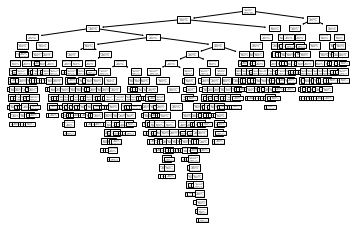

In [64]:
tree.plot_tree(classifier)

In [65]:
report = metrics.classification_report(y_test, y_test_pred, output_dict=True)
print(report)

{'0': {'precision': 0.33636363636363636, 'recall': 0.3425925925925926, 'f1-score': 0.3394495412844037, 'support': 108}, '1': {'precision': 0.5891891891891892, 'recall': 0.5317073170731708, 'f1-score': 0.558974358974359, 'support': 205}, '2': {'precision': 0.4140127388535032, 'recall': 0.4676258992805755, 'f1-score': 0.43918918918918914, 'support': 139}, 'accuracy': 0.4668141592920354, 'macro avg': {'precision': 0.44652185480210954, 'recall': 0.44730860298211295, 'f1-score': 0.445871029815984, 'support': 452}, 'weighted avg': {'precision': 0.47490890976038375, 'recall': 0.4668141592920354, 'f1-score': 0.4696849366056559, 'support': 452}}


In [66]:
metrics.accuracy_score(y_test, y_test_pred, normalize=False)

211

In [67]:
metrics.confusion_matrix(y_test, y_test_pred)

array([[ 37,  36,  35],
       [ 39, 109,  57],
       [ 34,  40,  65]], dtype=int64)

In [ ]:
#K model

In [88]:
df_groups = pd.read_excel('clgroups1920.xlsx')

cl_table = pd.merge(df_groups, h_stats,'left', left_on='HomeTeam', right_on='Home Club')
cl_match = pd.merge(cl_table, a_stats,'left',left_on='AwayTeam', right_on='Away Club')

#we'll be dropping the club names as they have no impact on results
cl_match.drop(columns = ['Home Club','Away Club'], inplace = True)

cl_match

,Group,HomeTeam,AwayTeam,Home Age,Home Overall,Home Potential,Home BOV,Home Attacking,Home Crossing,Home Finishing,...,Away GK Handling,Away GK Kicking,Away GK Positioning,Away GK Reflexes,Away Total StatsGK,Away Base StatsGK,Away W/FGK,Away SMGK,Away IRGK,Away PHYGK
0,A,Paris Saint-Germain,Real Madrid,24.615385,79.153846,79.153846,79.961538,327.153846,67.153846,58.076923,...,75.333333,71.666667,74.000000,78.000000,1208.666667,416.333333,2.666667,1.0,2.333333,74.000000
1,A,Club Brugge KV,Galatasaray SK,23.560000,72.600000,72.600000,73.800000,304.000000,60.840000,58.160000,...,68.000000,65.333333,69.000000,71.333333,1054.333333,379.000000,2.000000,1.0,1.666667,69.000000
2,A,Paris Saint-Germain,Club Brugge KV,24.615385,79.153846,79.153846,79.961538,327.153846,67.153846,58.076923,...,62.500000,58.000000,58.000000,72.500000,1019.500000,361.000000,3.000000,1.0,1.000000,58.000000
3,A,Real Madrid,Galatasaray SK,24.633333,79.733333,79.733333,80.533333,332.266667,70.066667,62.066667,...,68.000000,65.333333,69.000000,71.333333,1054.333333,379.000000,2.000000,1.0,1.666667,69.000000
4,A,Paris Saint-Germain,Galatasaray SK,24.615385,79.153846,79.153846,79.961538,327.153846,67.153846,58.076923,...,68.000000,65.333333,69.000000,71.333333,1054.333333,379.000000,2.000000,1.0,1.666667,69.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,H,LOSC Lille,Valencia CF,22.714286,72.464286,72.464286,73.214286,297.357143,58.607143,53.678571,...,68.500000,69.000000,69.250000,73.750000,1133.250000,392.750000,3.000000,1.0,1.500000,69.250000
80,H,LOSC Lille,Chelsea,22.714286,72.464286,72.464286,73.214286,297.357143,58.607143,53.678571,...,69.333333,71.000000,68.333333,70.666667,1143.000000,385.000000,3.000000,1.0,1.333333,68.333333
81,H,Ajax,Valencia CF,23.000000,74.520000,74.520000,75.720000,326.120000,67.960000,62.680000,...,68.500000,69.000000,69.250000,73.750000,1133.250000,392.750000,3.000000,1.0,1.500000,69.250000
82,H,Valencia CF,Chelsea,24.310345,75.482759,75.482759,76.137931,321.034483,63.586207,61.620690,...,69.333333,71.000000,68.333333,70.666667,1143.000000,385.000000,3.000000,1.0,1.333333,68.333333


In [ ]:
# we check for any nan results

In [83]:
nan = cl_match[cl_match['Home Club'].isna()]
nan['HomeTeam'].unique()

array(['FC Bayern München', 'Atlético Madrid'], dtype=object)

In [ ]:
#now we replace the teams from each datasets to match

In [89]:
df_groups['HomeTeam'] = df_groups['HomeTeam'].replace('FC Bayern München', 'Bayern Munich')
df_groups['AwayTeam'] = df_groups['AwayTeam'].replace('FC Bayern München', 'Bayern Munich')
df_groups['HomeTeam'] = df_groups['HomeTeam'].replace('Atlético Madrid', 'Ath Madrid')
df_groups['AwayTeam'] = df_groups['AwayTeam'].replace('Atlético Madrid', 'Ath Madrid')

In [93]:
cl_table = pd.merge(df_groups, h_stats,'left', left_on='HomeTeam', right_on='Home Club')
cl_match = pd.merge(cl_table, a_stats,'left',left_on='AwayTeam', right_on='Away Club')
cl_match.drop(columns = ['Home Club','Away Club'], inplace = True)

cl_match

,Group,HomeTeam,AwayTeam,Home Age,Home Overall,Home Potential,Home BOV,Home Attacking,Home Crossing,Home Finishing,...,Away GK Handling,Away GK Kicking,Away GK Positioning,Away GK Reflexes,Away Total StatsGK,Away Base StatsGK,Away W/FGK,Away SMGK,Away IRGK,Away PHYGK
0,A,Paris Saint-Germain,Real Madrid,24.615385,79.153846,79.153846,79.961538,327.153846,67.153846,58.076923,...,75.333333,71.666667,74.000000,78.000000,1208.666667,416.333333,2.666667,1.0,2.333333,74.000000
1,A,Club Brugge KV,Galatasaray SK,23.560000,72.600000,72.600000,73.800000,304.000000,60.840000,58.160000,...,68.000000,65.333333,69.000000,71.333333,1054.333333,379.000000,2.000000,1.0,1.666667,69.000000
2,A,Paris Saint-Germain,Club Brugge KV,24.615385,79.153846,79.153846,79.961538,327.153846,67.153846,58.076923,...,62.500000,58.000000,58.000000,72.500000,1019.500000,361.000000,3.000000,1.0,1.000000,58.000000
3,A,Real Madrid,Galatasaray SK,24.633333,79.733333,79.733333,80.533333,332.266667,70.066667,62.066667,...,68.000000,65.333333,69.000000,71.333333,1054.333333,379.000000,2.000000,1.0,1.666667,69.000000
4,A,Paris Saint-Germain,Galatasaray SK,24.615385,79.153846,79.153846,79.961538,327.153846,67.153846,58.076923,...,68.000000,65.333333,69.000000,71.333333,1054.333333,379.000000,2.000000,1.0,1.666667,69.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,H,LOSC Lille,Valencia CF,22.714286,72.464286,72.464286,73.214286,297.357143,58.607143,53.678571,...,68.500000,69.000000,69.250000,73.750000,1133.250000,392.750000,3.000000,1.0,1.500000,69.250000
80,H,LOSC Lille,Chelsea,22.714286,72.464286,72.464286,73.214286,297.357143,58.607143,53.678571,...,69.333333,71.000000,68.333333,70.666667,1143.000000,385.000000,3.000000,1.0,1.333333,68.333333
81,H,Ajax,Valencia CF,23.000000,74.520000,74.520000,75.720000,326.120000,67.960000,62.680000,...,68.500000,69.000000,69.250000,73.750000,1133.250000,392.750000,3.000000,1.0,1.500000,69.250000
82,H,Valencia CF,Chelsea,24.310345,75.482759,75.482759,76.137931,321.034483,63.586207,61.620690,...,69.333333,71.000000,68.333333,70.666667,1143.000000,385.000000,3.000000,1.0,1.333333,68.333333


In [ ]:
# we check again

In [87]:
nan = cl_match[cl_match['Home Club'].isna()]
nan['HomeTeam'].unique()

array([], dtype=object)

In [91]:
cl_match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 0 to 83
Columns: 147 entries, Group  to Away PHYGK
dtypes: float64(142), object(5)
memory usage: 97.1+ KB


In [ ]:
#

In [ ]:
# Normalize our data

In [95]:
scaler.fit(cl_match.iloc[:,3:])

scaled_feat = scaler.transform(cl_match.iloc[:,3:])
cl_table_feat = pd.DataFrame(scaled_feat)

cl_X = cl_table_feat

first_prediction = classifier.predict(cl_X)

In [ ]:
# we set the Home wins(1) , Away win(2), & Draw(0) to their equivalent points.
# all teams start with zero points and depending on each result they can earn either 3, 1 or 0 points.
# we predict result from group A

In [97]:
cl_match['Results'] = first_prediction
match_result = cl_match[['Group ','HomeTeam','AwayTeam','Results']]
match_result['Home_points']=0
match_result['Away_points']=0

match_result['Home_points'][match_result['Results'] == 1] = 3
match_result['Away_points'][match_result['Results'] == 2] = 3
match_result['Home_points'][match_result['Results'] == 0] = 1
match_result['Away_points'][match_result['Results'] == 0] = 1
match_result[match_result['Group '] == 'A']

<ipython-input-97-5b777eb4a4c0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_result['Home_points']=0
<ipython-input-97-5b777eb4a4c0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_result['Away_points']=0
<ipython-input-97-5b777eb4a4c0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_result['Home_poi

,Group,HomeTeam,AwayTeam,Results,Home_points,Away_points
0,A,Paris Saint-Germain,Real Madrid,0,1,1
1,A,Club Brugge KV,Galatasaray SK,2,0,3
2,A,Paris Saint-Germain,Club Brugge KV,1,3,0
3,A,Real Madrid,Galatasaray SK,0,1,1
4,A,Paris Saint-Germain,Galatasaray SK,1,3,0
5,A,Real Madrid,Club Brugge KV,1,3,0
6,A,Real Madrid,Paris Saint-Germain,1,3,0
7,A,Galatasaray SK,Club Brugge KV,0,1,1
8,A,Club Brugge KV,Paris Saint-Germain,2,0,3
9,A,Galatasaray SK,Real Madrid,2,0,3


In [ ]:
# we group and sum up the total point each team get from home and away points

In [123]:
home_points = match_result.groupby(['Group ','HomeTeam']).sum()
home_points = home_points.drop(['Home_points','Results'], axis = 1)

away_points = match_result.groupby(['Group ','AwayTeam']).sum()
away_points = away_points.drop(['Away_points','Results'], axis = 1)

home_points.reset_index(inplace=True)
away_points.reset_index(inplace=True)

home_points

,Group,HomeTeam,Away_points
0,A,Club Brugge KV,9
1,A,Galatasaray SK,7
2,A,Paris Saint-Germain,1
3,A,Real Madrid,1
4,B,Bayern Munich,1
5,B,Olympiacos CFP,3
6,B,Tottenham Hotspur,4
7,C,Atalanta,4
8,C,Dinamo Zagreb,9
9,C,Manchester City,0


In [ ]:
# This is the final prediction for teams that won their groups and went to the playoffs. 

In [127]:

final_prediction = pd.concat([home_points, away_points],axis=1)

final_prediction['Total Points'] = final_prediction['Home_points'] + final_prediction['Away_points']
final_prediction = final_prediction.drop(columns=['Home_points','Away_points','AwayTeam'],axis=1)

final_prediction = final_prediction.iloc[:,~final_prediction.columns.duplicated()]
final_prediction = final_prediction.groupby(['Group ','HomeTeam']).sum()

final_prediction.sort_values(['Group ','Total Points'],ascending=False).groupby('Group ').head(2)


Total Points
Group  HomeTeam                          
H      LOSC Lille                      13
       Valencia CF                      7
G      Olympique Lyonnais               9
       SL Benfica                       7
F      FC Barcelona                    10
       Inter                            8
E      FC Red Bull Salzburg             8
       Napoli                           7
D      Ath Madrid                      15
       Lokomotiv Moscow                10
C      Dinamo Zagreb                   12
       Atalanta                         8
B      Tottenham Hotspur                8
       Olympiacos CFP                   7
A      Club Brugge KV                  16
       Galatasaray SK                  11